<a href="https://colab.research.google.com/github/lazygirlleen/submission/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Email:** sulistiani3399@gmail.com
- **ID Dicoding:** hiitslizeu


## Menentukan Pertanyaan Bisnis

- Bagaimana tren dan pola peminjaman sepeda dalam bulanan?
- Bagaimana pengaruh cuaca dan musim terhadap tingkat peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("day.csv", delimiter=",")
df_hour = pd.read_csv("hour.csv", delimiter=",")

print(df_day.shape)
df_day.head()

print(df_hour.shape)
df_hour.head()

(731, 16)
(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Faktor cuaca dapat memengaruhi penggunaan sepeda (weathersit, temp, hum, windspeed)
- Dapat membangun menganalisis variabel yang berhubungan dengan cuaca, musim, dan sejenisnya (season, weathersit, temp, hum, windsepeed
- Dataset terdiri dari data harian (`df_day`) dan data per jam (`df_hour`).

### Assessing Data

In [ ]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
df_day.describe()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayofweek
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.543594,0.474354,0.645649,0.346536,848.176471,3656.172367,4504.348837,3.002736
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.079070,0.000000,0.000000,2.000000,20.000000,22.000000,0.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.346343,0.337842,0.534704,0.232045,315.500000,2497.000000,3152.000000,1.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.547268,0.486733,0.644388,0.326928,713.000000,3662.000000,4548.000000,3.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.743002,0.608602,0.750857,0.434622,1096.000000,4776.500000,5956.000000,5.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,0.840896,1.000000,1.000000,3410.000000,6946.000000,8714.000000,6.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.228091,0.162961,0.146457,0.159766,686.622488,1560.256377,1937.211452,2.004787


In [ ]:
print(df_day.dtypes)

instant                int64
dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dayofweek              int32
dtype: object


**Insight:**
- Kedua dataset tidak memiliki missing value
- Kedua dataset tidak memiliki data yang duplikat
- Data siap untuk analisis dan dilakukan pemodelan

### Cleaning Data

In [ ]:
print(df_day[(df_day['temp'] < 0) | (df_day['temp'] > 1)])
print(df_hour[(df_hour['temp'] < 0) | (df_hour['temp'] > 1)])

df_day = df_day[(df_day['temp'] >= 0) & (df_day['temp'] <= 1)]
df_hour = df_hour[(df_hour['temp'] >= 0) & (df_hour['temp'] <= 1)]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

df_day['season'] = df_day['season'].astype('category')
df_hour['season'] = df_hour['season'].astype('category')

In [ ]:
scaler = MinMaxScaler()
df_day[['temp', 'hum', 'windspeed']] = scaler.fit_transform(df_day[['temp', 'hum', 'windspeed']])
df_hour[['temp', 'hum', 'windspeed']] = scaler.fit_transform(df_hour[['temp', 'hum', 'windspeed']])

**Insight:**
- Data pada kolom temp sudah konsisten dan valid
- Kolom dteday (tanggal) sekarang dalam format yang benar (datetime)
- Kolom season sekarang menjadi data kategorikal, sehingga lebih efisien untuk analisis dan visualisasi

## Exploratory Data Analysis (EDA)

### Explore ...

Pertanyaan 1:

In [ ]:
df_day.describe(include="all")
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.486722,0.475775,0.627229,0.223460,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.326531,0.333300,0.480000,0.122840,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.489796,0.484800,0.630000,0.228047,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.653061,0.621200,0.780000,0.298225,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,367.000000,886.000000,977.000000


In [ ]:
monthly_data = df_day.groupby('mnth')[['cnt']].sum()
print(monthly_data)

         cnt
mnth        
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036


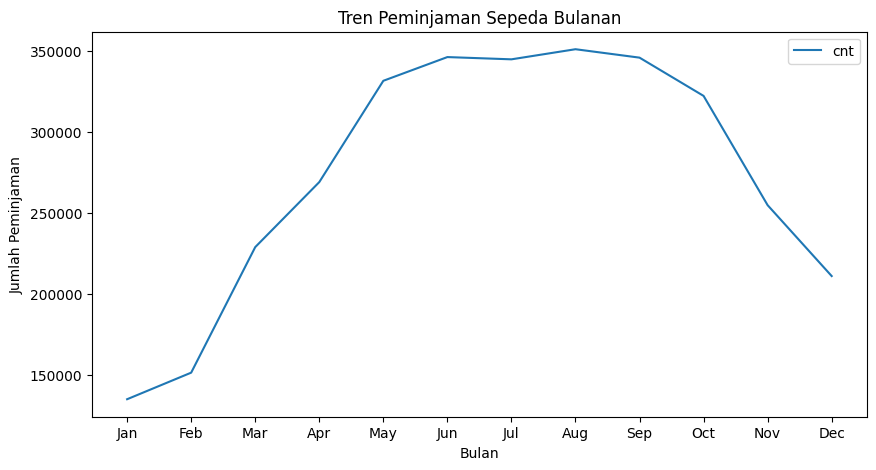

In [ ]:
monthly_data.plot(kind='line', figsize=(10, 5))
plt.title('Tren Peminjaman Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(monthly_data.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<Axes: xlabel='cnt', ylabel='Count'>

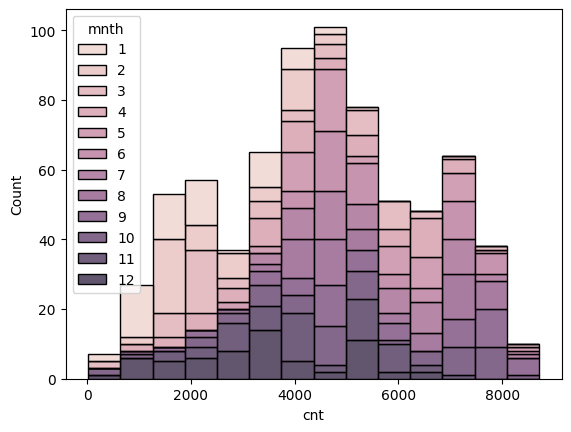

In [ ]:
sns.histplot(data=df_day, x="cnt", hue="mnth", multiple="stack")

In [ ]:
hourly_data = df_hour.groupby('hr')[['cnt']].sum()
print(hourly_data)

       cnt
hr        
0    39130
1    24164
2    16352
3     8174
4     4428
5    14261
6    55132
7   154171
8   261001
9   159438
10  126257
11  151320
12  184414
13  184919
14  175652
15  183149
16  227748
17  336860
18  309772
19  226789
20  164550
21  125445
22   95612
23   63941


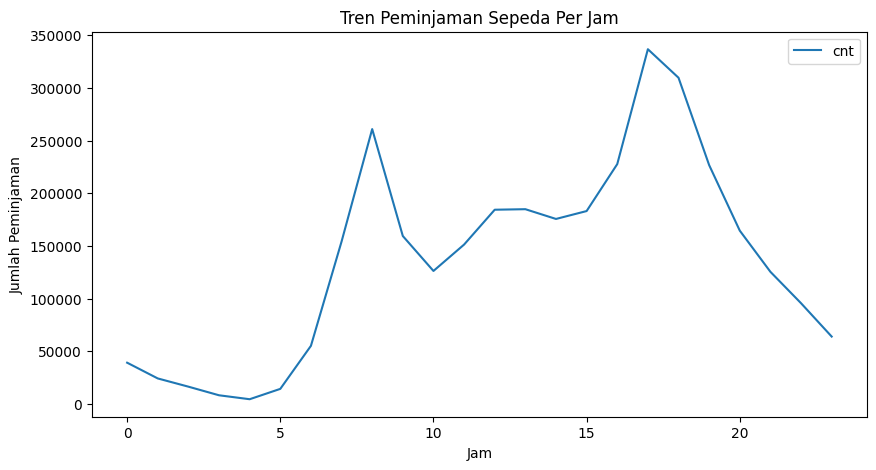

In [ ]:
hourly_data.plot(kind='line', figsize=(10, 5))
plt.title('Tren Peminjaman Sepeda Per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

Pertanyaan 2:

In [ ]:
df_day['season'].value_counts()
df_hour['weathersit'].value_counts()

,count
weathersit,
1,11413
2,4544
3,1419
4,3


In [ ]:
df_day.groupby(by="season").agg({"cnt": "sum"})

<ipython-input-95-52646412444b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day.groupby(by="season").agg({"cnt": "sum"})


,cnt
season,
1,471348
2,918589
3,1061129
4,841613


<Axes: xlabel='cnt', ylabel='Count'>

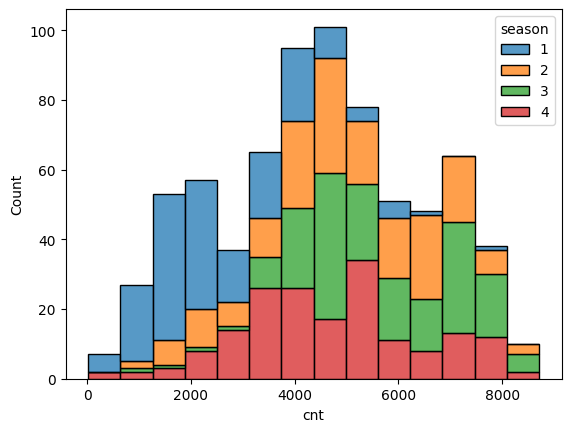

In [ ]:
sns.histplot(data=df_day, x="cnt", hue="season", multiple="stack")

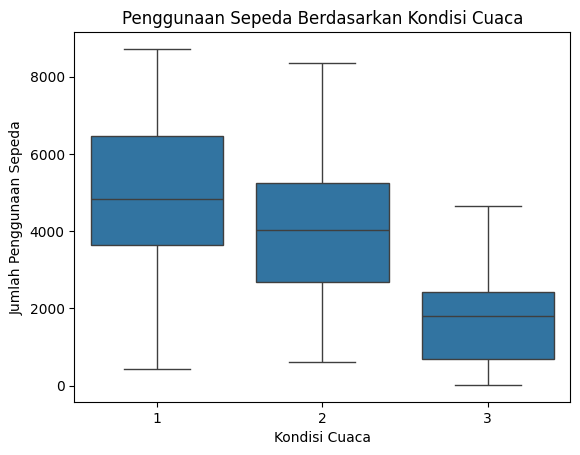

In [ ]:
# Pengaruh cuasa

sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.show()

**Insight:**
- Penggunaan sepeda pada musim gugur dan musim panas terjadi lebih banyak daripada musim lainnya.
- Peminjaman sepeda terjadi peningkatan pada bulan mei-juli
- Penurunan peminjaman sepeda terjadi pada bulan desember- februari
- Terdapat peningkatan peminjam casual pada jam 6-8 dan 16-17
- Penurunan peminjaman saat cuaca badai atau hujan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

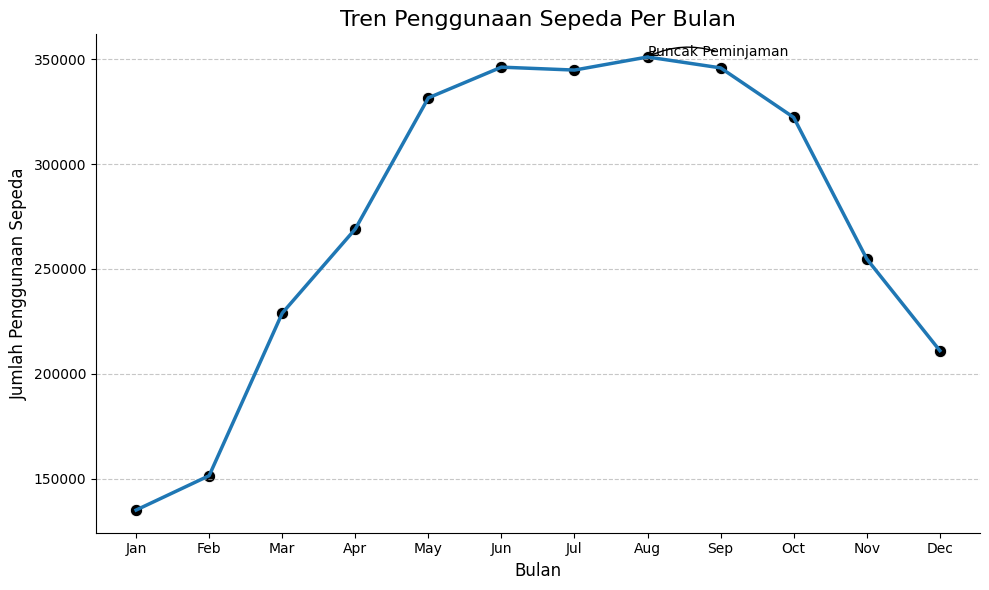

In [ ]:
monthly_trend = df_day.groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', data=monthly_trend, linewidth=2.5)

sns.scatterplot(x='mnth', y='cnt', data=monthly_trend, s=80, color='black')

plt.title('Tren Penggunaan Sepeda Per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penggunaan Sepeda', fontsize=12)
plt.xticks(monthly_trend['mnth'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.annotate('Puncak Peminjaman', xy=(monthly_trend['mnth'][monthly_trend['cnt'].idxmax()], monthly_trend['cnt'].max()),
             xytext=(monthly_trend['mnth'][monthly_trend['cnt'].idxmax()], monthly_trend['cnt'].max() + 500),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))


plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

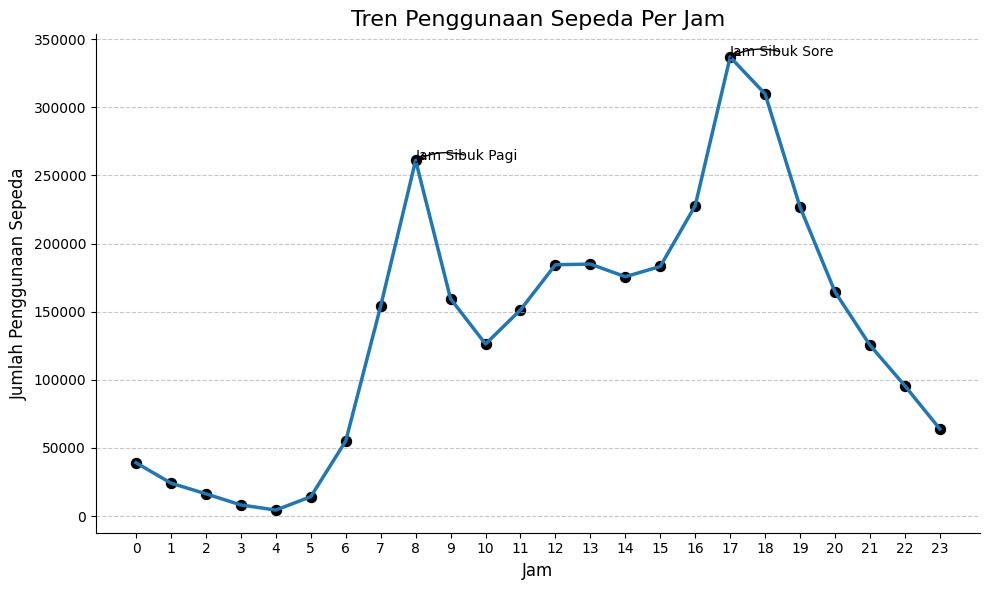

In [ ]:
hourly_trend = df_hour.groupby('hr')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_trend, linewidth=2.5)

sns.scatterplot(x='hr', y='cnt', data=hourly_trend, s=80, color='black')

plt.title('Tren Penggunaan Sepeda Per Jam', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Penggunaan Sepeda', fontsize=12)
plt.xticks(range(24))

plt.annotate('Jam Sibuk Pagi', xy=(8, hourly_trend.loc[hourly_trend['hr'] == 8, 'cnt'].values[0]),
             xytext=(8, hourly_trend.loc[hourly_trend['hr'] == 8, 'cnt'].values[0] + 500),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
plt.annotate('Jam Sibuk Sore', xy=(17, hourly_trend.loc[hourly_trend['hr'] == 17, 'cnt'].values[0]),
             xytext=(17, hourly_trend.loc[hourly_trend['hr'] == 17, 'cnt'].values[0] + 500),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

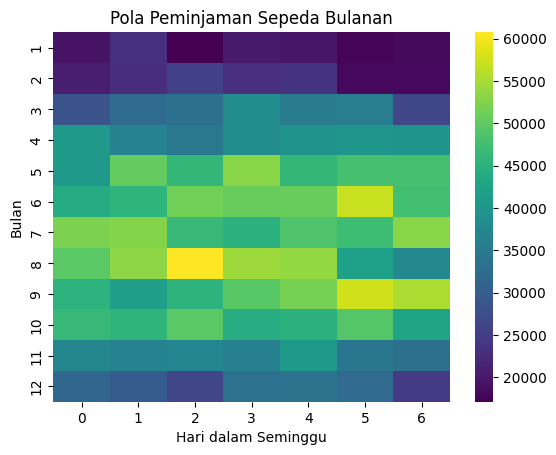

In [ ]:
df_day['dayofweek'] = df_day['dteday'].dt.dayofweek
heatmap_data = df_day.pivot_table(values='cnt', index='mnth', columns='dayofweek', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Pola Peminjaman Sepeda Bulanan')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Bulan')
plt.show()

### Pertanyaan 2:

<ipython-input-98-fd8f5a5083a8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_effect = df_day.groupby('season')['cnt'].sum().reset_index()


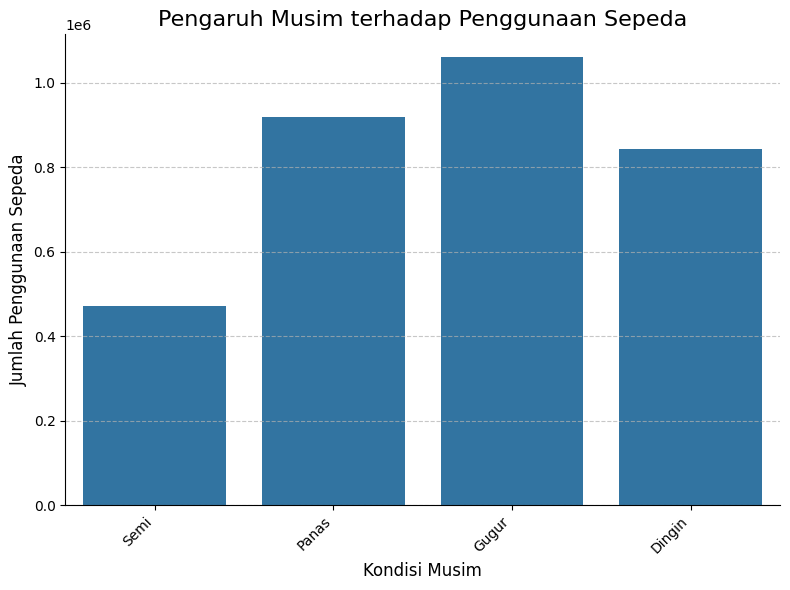

In [ ]:
season_effect = df_day.groupby('season')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=season_effect)

plt.title('Pengaruh Musim terhadap Penggunaan Sepeda', fontsize=16)
plt.xlabel('Kondisi Musim', fontsize=12)
plt.ylabel('Jumlah Penggunaan Sepeda', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Semi', 'Panas', 'Gugur', 'Dingin'], rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

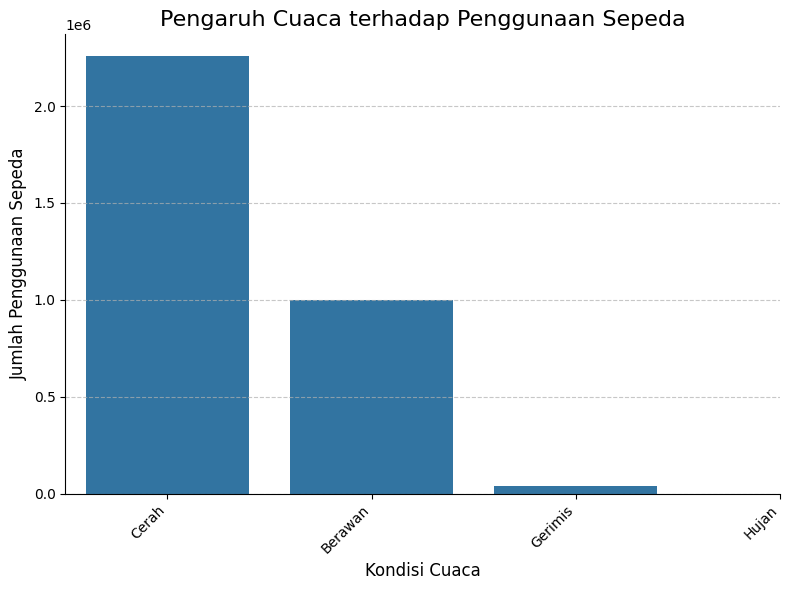

In [ ]:
weather_effect = df_day.groupby('weathersit')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_effect)

plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Penggunaan Sepeda', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Cerah', 'Berawan', 'Gerimis', 'Hujan'], rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

**Insight:**
- Peminjaman sepeda cenderung lebih tinggi saat musim gugur
- Puncak peminjaman sepeda ada pada bulan agustus
- Puncak peminjaman harian terjadi pada jam setengah 8 pagi dan 5 sore merupakan
- Peminjaman sepeda lebih banyak dilakukan saat cuaca cerah

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1:
Berdasarkan analisis data yang telah dilakukan tren peminjaman sepeda bulanan dipengaruhi oleh beberapa faktor, seperti hari libur, dan jam kerja/jam sekolah. Dapat terlihat dari peningkatan yang signifikan pada bulan Juni-Agustus yang kemungkinan disebabkan oleh hari libur musim panas. Puncaknya terjadi pada bulan Agustus. Selain itu, faktor jam mempengaruhi seperti pada jam setengah 8 pagi terjadi peningkatan, karena jam tersebut kebanyakan orang meminjam untuk pergi sekolah atau pergi ke kantor. Terjadinya peningkatan pada jam 5 sore bisa disebabkan anak-anak maupun orang dewasa menggunakan sepeda untuk refreshing dan bermain bersama teman mereka.
- Conclution pertanyaan 2:
Berdasarkan analisis data yang telah dilakukan menunjukkan cuaca memiliki pengaruh signifikan terhadap peminjaman sepeda. Lebih banyak yang melakukan peminjaman saat cuaca cerah. Kemudian, musim juga memberikan pengaruh terhadap tingkat peminjaman sepeda. Kebanyakan orang meminjam sepeda pada musim gugur, karena pengaruh cuacanya yang cukup sejuk
- Rekomendasi: Sebaiknya jasa peminjaman menambah stok sepeda pada saat musim panas. Untuk meramaikan bisnis bisa juga melakukan promosi dikala cuaca cerah. Jasa peminjaman dapat juga memberikan program keanggotaaan dengan beberapa benefit untuk pengguna yang mendaftar.
